In [21]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import glob
from scipy import stats
import re
import datetime
from scipy.interpolate import griddata
%matplotlib inline

In [6]:
dir_in = '/p/scratch/cjibg36/kaandorp2/'
files_atm = glob.glob( os.path.join(dir_in,'CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/*.nc') )
grid_dest = xr.load_dataset( os.path.join(dir_in,'TSMP/tsmp_cordex_109x106/input_clm/griddata_cordex_109x106.nc') )
grid_dest

<xarray.Dataset>
Dimensions:   (lsmlat: 106, lsmlon: 109, ncl2: 1, ncl3: 1, ncl4: 1, ncl5: 1)
Dimensions without coordinates: lsmlat, lsmlon, ncl2, ncl3, ncl4, ncl5
Data variables: (12/13)
    NUMLON    (lsmlat) float64 109.0 109.0 109.0 109.0 ... 109.0 109.0 109.0
    LONGXY    (lsmlat, lsmlon) float64 -10.27 -9.874 -9.476 ... 66.04 66.85
    LATIXY    (lsmlat, lsmlon) float64 21.43 21.59 21.75 ... 67.31 67.06 66.81
    LONE      (lsmlat, lsmlon) float64 -10.17 -9.771 -9.372 ... 66.52 67.33
    LATN      (lsmlat, lsmlon) float64 21.62 21.78 21.94 ... 67.38 67.13 66.87
    LONW      (lsmlat, lsmlon) float64 -10.42 -10.03 -9.632 ... 64.35 65.18 66.0
    ...        ...
    AREA      (lsmlat, lsmlon) float64 2.5e+03 2.5e+03 ... 2.5e+03 2.5e+03
    LANDMASK  (lsmlat, lsmlon) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    EDGEN     (ncl2) float64 67.73
    EDGEE     (ncl3) float64 37.53
    EDGES     (ncl4) float64 21.09
    EDGEW     (ncl5) float64 -10.43
Attributes:
    creation_date:  2023-01-23 14:12:50.349686
    Conventions:    None
    source_file:    jkeune, Coarsened by m.kaandorp
    title:          Synthetic Data for CLM3.5 on the CORDEX 0.11 domain, Coar...

In [4]:
files_atm

['/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-11.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-01.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-07.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-04.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-05.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-12.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-03.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-02.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-08.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex3km_clm3.5_testcase/atmforcings/2000-10.nc',
 '/p/scratch/cjibg36/kaandorp2/CORDEX_3km/eucordex

In [107]:
vars_interpolate = ['TBOT','PSRF','RH','PRECTmms','FSDS','FLDS','WIND']
vars_copy = ['LATIXY','LONGXY','LONE','LONW','LATS','LATN','EDGEE','EDGES','EDGEW','EDGEN']

for file_ in files_atm[0:1]:
    
    data = xr.load_dataset(file_)
    
    data_out = grid_dest.copy()
    
    
data

<xarray.Dataset>
Dimensions:   (time: 120, lat: 1544, lon: 1592, lsmlat: 1544, lsmlon: 1592, ncl3: 1, ncl4: 1, ncl5: 1, ncl2: 1)
Coordinates:
  * time      (time) datetime64[ns] 2000-11-01 ... 2000-11-30T18:00:00
Dimensions without coordinates: lat, lon, lsmlat, lsmlon, ncl3, ncl4, ncl5, ncl2
Data variables: (12/17)
    TBOT      (time, lat, lon) float32 294.5 294.5 294.6 ... 259.5 259.8 259.8
    PSRF      (time, lat, lon) float32 9.833e+04 9.833e+04 ... 1.004e+05
    RH        (time, lat, lon) float32 29.72 29.7 29.58 ... 86.51 86.22 86.19
    PRECTmms  (time, lat, lon) float32 0.0 0.0 0.0 ... 3.976e-05 3.965e-05
    FSDS      (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    FLDS      (time, lat, lon) float32 298.8 298.7 298.3 ... 255.4 256.0 255.9
    ...        ...
    LATS      (lsmlat, lsmlon) float64 23.76 23.76 23.76 ... 66.19 66.19 66.19
    LATN      (lsmlat, lsmlon) float64 23.78 23.78 23.78 ... 66.22 66.22 66.22
    EDGEE     (ncl3) float64 34.4
    EDGES     (ncl4) float64 23.76
    EDGEW     (ncl5) float64 -9.383
    EDGEN     (ncl2) float64 66.22
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Mar 31 18:46:48 2020: cdo -O chname,FSDR,FSDS,FLDR,FLDS...
    CDO:          Climate Data Operators version 1.9.1 (http://mpimet.mpg.de/...

In [106]:
# dsi = ds.interp(lat=new_lat, lon=new_lon)
# data_out['TBOT'].interp(lat=
# data['TBOT']
data

<xarray.Dataset>
Dimensions:   (time: 120, lat: 1544, lon: 1592, lsmlat: 1544, lsmlon: 1592, ncl3: 1, ncl4: 1, ncl5: 1, ncl2: 1)
Coordinates:
  * time      (time) datetime64[ns] 2000-11-01 ... 2000-11-30T18:00:00
Dimensions without coordinates: lat, lon, lsmlat, lsmlon, ncl3, ncl4, ncl5, ncl2
Data variables: (12/17)
    TBOT      (time, lat, lon) float32 294.5 294.5 294.6 ... 259.5 259.8 259.8
    PSRF      (time, lat, lon) float32 9.833e+04 9.833e+04 ... 1.004e+05
    RH        (time, lat, lon) float32 29.72 29.7 29.58 ... 86.51 86.22 86.19
    PRECTmms  (time, lat, lon) float32 0.0 0.0 0.0 ... 3.976e-05 3.965e-05
    FSDS      (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    FLDS      (time, lat, lon) float32 298.8 298.7 298.3 ... 255.4 256.0 255.9
    ...        ...
    LATS      (lsmlat, lsmlon) float64 23.76 23.76 23.76 ... 66.19 66.19 66.19
    LATN      (lsmlat, lsmlon) float64 23.78 23.78 23.78 ... 66.22 66.22 66.22
    EDGEE     (ncl3) float64 34.4
    EDGES     (ncl4) float64 23.76
    EDGEW     (ncl5) float64 -9.383
    EDGEN     (ncl2) float64 66.22
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Mar 31 18:46:48 2020: cdo -O chname,FSDR,FSDS,FLDR,FLDS...
    CDO:          Climate Data Operators version 1.9.1 (http://mpimet.mpg.de/...

In [88]:
data_out = grid_dest.copy()
data_out = data_out.drop('NUMLON')
data_out['time'] = data['time']
# data_out['lon'] = data_out['lsmlon'].values
# data_out['lat'] = data_out['lsmlat'].values
test = griddata((data['LATIXY'].data.ravel(),data['LONGXY'].data.ravel()),
                data['TBOT'].data[0].ravel(),
                (data_out['LATIXY'].data,data_out['LONGXY'].data),
                method='nearest') 
# data_out['TBOT'] = griddata((data['TBOT']['LATIXY'].ravel(),data['TBOT']['LONGXY'].ravel()),
#                             data['TBOT'].data[0].ravel(),
#                             (data_out['LATIXY'].ravel(),data_out['LONGXY'].ravel()) )
                            
# # create a temp dataset with the true longitudes and latitudes (instead of [0,1,...n])
# # take cell midpoints as lon/lat
# ds_tmp = xr.Dataset(data_vars=dict(TBOT=(['time','y','x'],data['TBOT'].data)), 
#                     coords=dict(lon=(["y", "x"], data['LONGXY'].data),
#                                 lat=(["y", "x"], data['LATIXY'].data),
#                                 time=data['time'].data) )

# #then interpolate onto the coarsened grid
# ds_tmp_i = ds_tmp.interp(x=data_out['LONGXY'].data.ravel(),y=data_out['LATIXY'].data.ravel(),method='nearest')

# data_out['LONGXY']
# ds_tmp
# data['TBOT']
# ds_tmp = data['TBOT']
# ds_tmp

# data['LONGXY']
# data['TBOT']
# ds_tmp['TBOT']['lon']

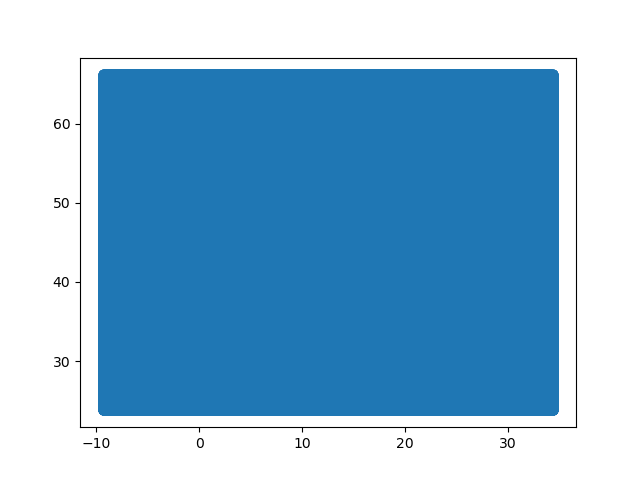

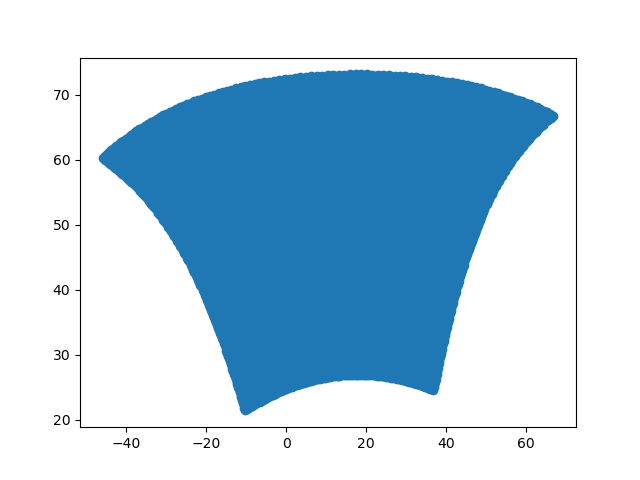

In [104]:
%matplotlib widget

plt.figure()
plt.plot(data['LONGXY'].data.ravel(),data['LATIXY'].data.ravel(),'o')

plt.figure()
plt.plot(data_out['LONGXY'].data.ravel(),data_out['LATIXY'].data.ravel(),'o')

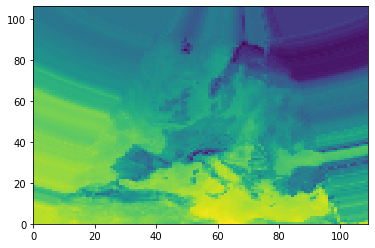

In [92]:
plt.pcolormesh(test)

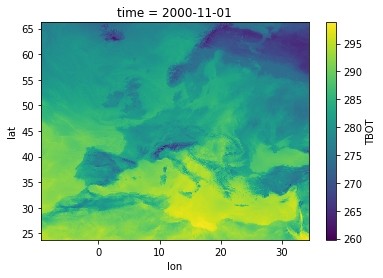

In [63]:
ds_tmp.TBOT[0].plot.pcolormesh(x='lon',y='lat')

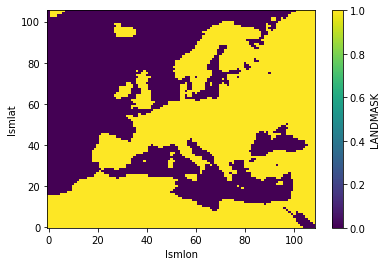

In [95]:
grid_dest.LANDMASK.plot.pcolormesh()

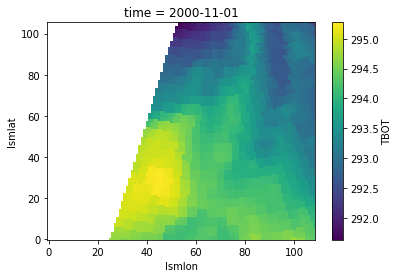

In [70]:
ds_tmp_i.TBOT[0].plot.pcolormesh(x='lsmlon',y='lsmlat')

In [5]:
data = xr.load_dataset(files_atm[0])
data

<xarray.Dataset>
Dimensions:   (time: 120, lat: 1544, lon: 1592, lsmlat: 1544, lsmlon: 1592, ncl3: 1, ncl4: 1, ncl5: 1, ncl2: 1)
Coordinates:
  * time      (time) datetime64[ns] 2000-11-01 ... 2000-11-30T18:00:00
Dimensions without coordinates: lat, lon, lsmlat, lsmlon, ncl3, ncl4, ncl5, ncl2
Data variables: (12/17)
    TBOT      (time, lat, lon) float32 294.5 294.5 294.6 ... 259.5 259.8 259.8
    PSRF      (time, lat, lon) float32 9.833e+04 9.833e+04 ... 1.004e+05
    RH        (time, lat, lon) float32 29.72 29.7 29.58 ... 86.51 86.22 86.19
    PRECTmms  (time, lat, lon) float32 0.0 0.0 0.0 ... 3.976e-05 3.965e-05
    FSDS      (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    FLDS      (time, lat, lon) float32 298.8 298.7 298.3 ... 255.4 256.0 255.9
    ...        ...
    LATS      (lsmlat, lsmlon) float64 23.76 23.76 23.76 ... 66.19 66.19 66.19
    LATN      (lsmlat, lsmlon) float64 23.78 23.78 23.78 ... 66.22 66.22 66.22
    EDGEE     (ncl3) float64 34.4
    EDGES     (ncl4) float64 23.76
    EDGEW     (ncl5) float64 -9.383
    EDGEN     (ncl2) float64 66.22
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Mar 31 18:46:48 2020: cdo -O chname,FSDR,FSDS,FLDR,FLDS...
    CDO:          Climate Data Operators version 1.9.1 (http://mpimet.mpg.de/...

In [110]:
files_clm = xr.load_dataset( os.path.join(dir_in,'CORDEX_3km/eucordex3km_clm3.5_testcase/inputdata/griddata_CLM_cordex0.03_1592x1544_cosmomask_varpft_noice.nc') )

In [111]:
files_clm['AREA'].values

array([[9., 9., 9., ..., 9., 9., 9.],
       [9., 9., 9., ..., 9., 9., 9.],
       [9., 9., 9., ..., 9., 9., 9.],
       ...,
       [9., 9., 9., ..., 9., 9., 9.],
       [9., 9., 9., ..., 9., 9., 9.],
       [9., 9., 9., ..., 9., 9., 9.]])